## Assignment 3

#### Import Libraries

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Load dataset

In [10]:
dataset=pd.read_csv("tips.csv")

#### Explore data

In [35]:
dataset.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [11]:
dataset.shape

(244, 7)

In [12]:
dataset.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [13]:
dataset.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [15]:
dataset.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [16]:
dataset.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [27]:
cols=dataset.columns
num_cols = dataset._get_numeric_data().columns
cat_cols=list(set(cols) - set(num_cols))

In [34]:
for i in cat_cols:
    print('Column:',i.upper())
    print(dataset[str(i)].unique())
    print(' ')

Column: TIME
['Dinner' 'Lunch']
 
Column: DAY
['Sun' 'Sat' 'Thur' 'Fri']
 
Column: SMOKER
['No' 'Yes']
 
Column: SEX
['Female' 'Male']
 


### Plotting the Data

In [37]:
dataset.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Bar Plot

In [46]:
data=dataset.groupby(['day'],as_index=False).agg({'total_bill':'sum'}).copy(deep=True)
y=data['total_bill'].unique().tolist()

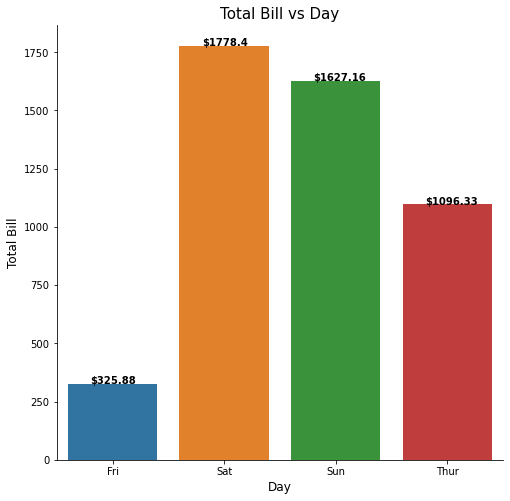

In [52]:
fig,ax=plt.subplots(1,1,figsize=(8,8))
axes=sns.barplot(x='day',y='total_bill',data=data)
plt.xlabel('Day',fontsize=12)
plt.ylabel('Total Bill',fontsize=12)
plt.title('Total Bill vs Day',fontsize=15)
xlocs,xlabs=plt.xticks()
for i,v in enumerate(y):
    plt.text(xlocs[i]-0.2,v+1,'$'+str(v),fontweight='bold')
sns.despine()

At the weekends like saturday and sunday the Total bill was higher than the weekdays like friday and saturday.

### Boxplot

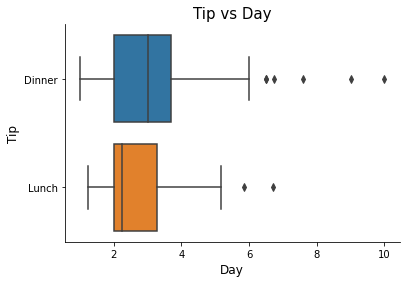

In [67]:
sns.boxplot(x='tip',y='time',data=dataset)
plt.xlabel('Day',fontsize=12)
plt.ylabel('Tip',fontsize=12)
plt.title('Tip vs Day',fontsize=15)
sns.despine()

At the dinner the outliers are more and tip may vary per person at the dinner time 

### LinePlot

In [62]:
dataset['avg_bill_by_person']=dataset['total_bill']/dataset['size']
dataset['avg_tip_by_person']=dataset['tip']/dataset['size']

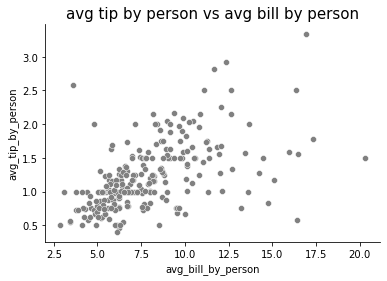

In [73]:
sns.scatterplot(x='avg_bill_by_person',y='avg_tip_by_person',data=dataset,color='gray')
plt.title('avg tip by person vs avg bill by person',fontsize=15)
sns.despine()

The linear trend is seen in the above plot as the avg tip by person increases with the avg bill by person 

### Pie chart

In [68]:
data=dataset.groupby(['smoker'],as_index=False).agg({'total_bill':'count'}).copy(deep=True)
data.columns=['smoker','percentage']
data['percentage']=(data['percentage']/data['percentage'].sum())*100

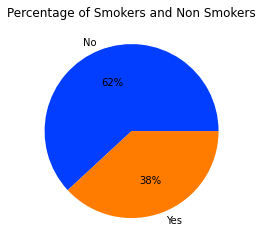

In [70]:
plt.pie(data['percentage'], labels=data['smoker'], colors=sns.color_palette('bright'), autopct='%.0f%%')
plt.title('Percentage of Smokers and Non Smokers')
plt.show()

There are 62% of the non somokers and the 38% of smokers in the data 